In [1]:
from sashimi_si import *
import matplotlib.pyplot as plt

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size']  = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size']  = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size']  = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size']  = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction']   = 'in'
plt.rcParams['ytick.direction']   = 'in'
plt.rcParams['xtick.major.pad']   = 8
plt.rcParams['xtick.top']         = True
plt.rcParams['ytick.right']       = True

# Specify SIDM parameters

First, read the 'subhalo_properties' class with SIDM parameters $\sigma_0/m_\chi$ and $w$. Here, we show a specific example with $\sigma_0/m_\chi = 147.1~\mathrm{cm^{2}~g^{-1}}$ and $w = 24.33~\mathrm{km~s^{-1}}$.

In [2]:
sh = subhalo_properties(sigma0_m=147.1,w=24.33)

# Calculate subhalo properties

Then you obtain various subhalo quantities by specifying the host parameters such as the mass and redshift. These are subhalo masses and density profile parameters $r_s$, $\rho_s$, and $\rho_c$ for SIDM and corresponding CDM. Read the documentation of the subhalo_properties function for full details. Note that subhalos are assumed to follow the NFW profile for CDM and cored-NFW profile for SIDM. See the paper for details.

In [3]:
ma200, z_acc, rsCDM_acc, rhosCDM_acc, rmaxCDM_acc, VmaxCDM_acc, rsSIDM_acc, rhosSIDM_acc, rcSIDM_acc, rmaxSIDM_acc, VmaxSIDM_acc, m_z0, rsCDM_z0, rhosCDM_z0, rmaxCDM_z0, VmaxCDM_z0, rsSIDM_z0, rhosSIDM_z0, rcSIDM_z0, rmaxSIDM_z0, VmaxSIDM_z0, ctCDM_z0, tt_ratio, weightCDM, weightSIDM, surviveCDM, surviveSIDM = sh.subhalo_properties_calc(1.e12*sh.Msun,redshift=0.,M0_at_redshift=True,dz=0.01,N_herm=20,zmax=5.,logmamin=6,N_ma=500)

Calculating subhalo properties: 100%|██████████| 179/179 [00:27<00:00,  6.56it/s]


# Distribution of $V_{\rm max}$ and $r_{\rm max}$

Next, we show how we make the 'heat map' for distribution of two of the density profile paramters $V_{\rm max}$ and $r_{\rm max}$. We show them for both the CDM and SIDM in the following. As a threshold mass, we adopt $m_{\rm sh} = 10^8 M_{\odot}/h$.

## CDM

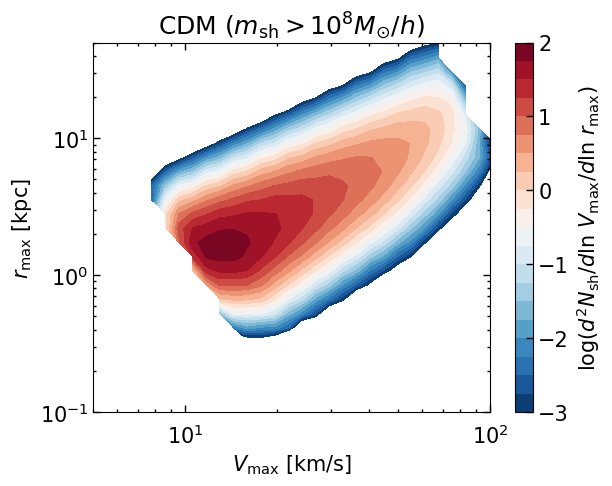

In [4]:
mth = 1.e8*sh.Msun/sh.h
condition = (m_z0>mth)*(weightSIDM>0.)

q1 = VmaxCDM_z0[condition]/(sh.km/sh.s)
q2 = rmaxCDM_z0[condition]/sh.kpc

N,x_edges,y_edges = np.histogram2d(np.log(np.maximum(q1,0.001)),np.log(q2),weights=weightCDM[condition],bins=[30,30])
x = (x_edges[:-1]+x_edges[1:])/2.
y = (y_edges[:-1]+y_edges[1:])/2.
dx = (x_edges[1:]-x_edges[:-1])[0]
dy = (y_edges[1:]-y_edges[:-1])[0]
d2Ndxdy = N/dx/dy
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e0,1e2)
plt.ylim(1e-1,5e1)
plt.xlabel(r'$V_{\rm max} \ [\mathrm{km/s}]$')
plt.ylabel(r'$r_{\rm max} \ [\mathrm{kpc}]$')
plt.title(r'CDM ($m_{\rm sh}>10^{8}M_{\odot}/h$)')
levels = np.linspace(-3,2,21)
plt.contourf(np.exp(x),np.exp(y),np.log10(d2Ndxdy.T),levels=levels,cmap='RdBu_r')
cbar = plt.colorbar(ticks=np.arange(2,-3.1,-1))
cbar.set_label(r'$\log(d^{2}N_{\rm sh}/d\ln\,V_{\rm max}/d\ln\,r_{\rm max})$',fontsize=15)

plt.show()

## SIDM

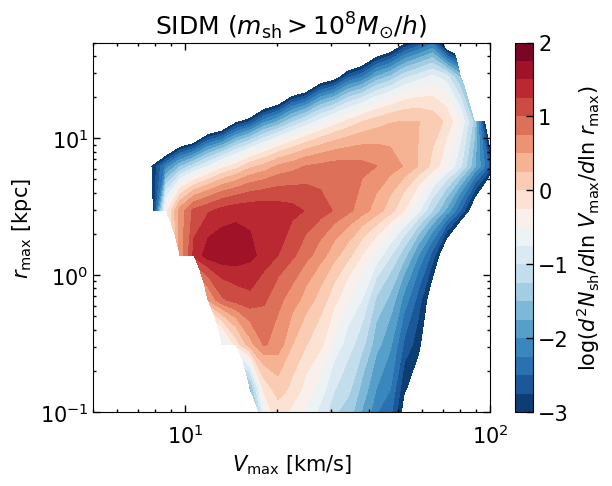

In [5]:
mth = 1.e8*sh.Msun/sh.h
condition = (m_z0>mth)*(weightSIDM>0.)

q1 = VmaxSIDM_z0[condition]/(sh.km/sh.s)
q2 = rmaxSIDM_z0[condition]/sh.kpc

N,x_edges,y_edges = np.histogram2d(np.log(np.maximum(q1,0.001)),np.log(q2),weights=weightSIDM[condition],bins=[30,30])
x = (x_edges[:-1]+x_edges[1:])/2.
y = (y_edges[:-1]+y_edges[1:])/2.
dx = (x_edges[1:]-x_edges[:-1])[0]
dy = (y_edges[1:]-y_edges[:-1])[0]
d2Ndxdy = N/dx/dy
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e0,1e2)
plt.ylim(1e-1,5e1)
plt.xlabel(r'$V_{\rm max} \ [\mathrm{km/s}]$')
plt.ylabel(r'$r_{\rm max} \ [\mathrm{kpc}]$')
plt.title(r'SIDM ($m_{\rm sh}>10^{8}M_{\odot}/h$)')
levels = np.linspace(-3,2,21)
plt.contourf(np.exp(x),np.exp(y),np.log10(d2Ndxdy.T),levels=levels,cmap='RdBu_r')
cbar = plt.colorbar(ticks=np.arange(2,-3.1,-1))
cbar.set_label(r'$\log(d^{2}N_{\rm sh}/d\ln\,V_{\rm max}/d\ln\,r_{\rm max})$',fontsize=15)

plt.show()

# Generating a subhalo sample.

We randomly generate subhalos following these distributions via Monte Carlo. 

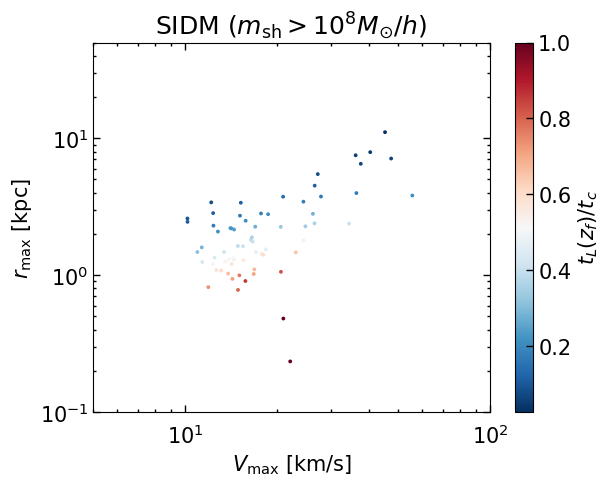

In [6]:
mth = 1.e8*sh.Msun/sh.h
condition = (m_z0>mth)*(weightSIDM>0.)

q1 = VmaxSIDM_z0[condition]/(sh.km/sh.s)
q2 = rmaxSIDM_z0[condition]/sh.kpc
c = tt_ratio[condition]
w = weightSIDM[condition]
p = w/np.sum(w)

mu_tot = np.sum(w)
N_tot = np.random.poisson(mu_tot)

index_random = np.random.choice(np.arange(len(p)),size=N_tot,p=p)
logVmax = q1[index_random]
logrmax = q2[index_random]
c = c[index_random]
c = np.minimum(c,1.)

plt.xscale('log')
plt.yscale('log')
plt.xlim(5e0,1e2)
plt.ylim(1e-1,5e1)
plt.xlabel(r'$V_{\rm max} \ [\mathrm{km/s}]$')
plt.ylabel(r'$r_{\rm max} \ [\mathrm{kpc}]$')
plt.title(r'SIDM ($m_{\rm sh}>10^{8}M_{\odot}/h$)')
plt.scatter(logVmax,logrmax,c=c,s=3,cmap='RdBu_r')
cbar = plt.colorbar(ticks=np.arange(1,-0.1,-0.2))
cbar.set_label(r'$t_L(z_f)/t_c$',fontsize=15)
plt.show()


# Subhalo mass function

We then plot the subhalo mass function $dN_{\rm sh}/dm$ for all the SIDM subhalos and collapsed ones.

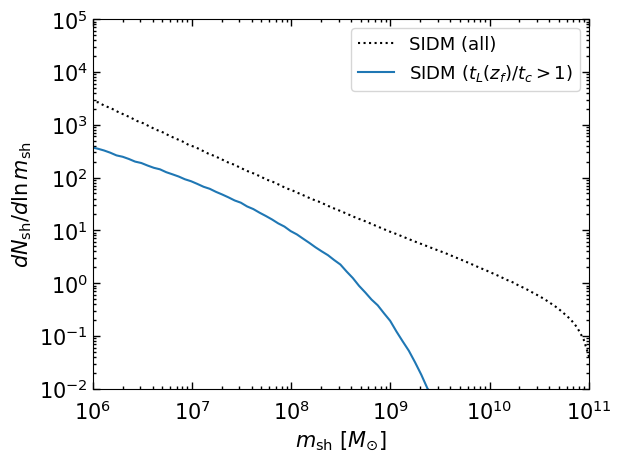

In [7]:
condition = weightSIDM>0.
q = m_z0[condition]/sh.Msun
N,lnx_edges = np.histogram(np.log(q),weights=weightSIDM[condition],bins=100)
lnx = (lnx_edges[1:]+lnx_edges[:-1])/2.
x = np.exp(lnx)
dlnx = lnx_edges[1:]-lnx_edges[:-1]
dNdlnx = N/dlnx
plt.loglog(x,dNdlnx,':',c='k',label='SIDM (all)')

condition = (weightSIDM>0.)*(tt_ratio>1.)
q = m_z0[condition]/sh.Msun
N,lnx_edges = np.histogram(np.log(q),weights=weightCDM[condition],bins=100)
lnx = (lnx_edges[1:]+lnx_edges[:-1])/2.
x = np.exp(lnx)
dlnx = lnx_edges[1:]-lnx_edges[:-1]
dNdlnx = N/dlnx
plt.loglog(x,dNdlnx,'-',label=r'SIDM ($t_L(z_f)/t_c>1$)')

plt.ylim(1e-2,1e5)
plt.xlim(1e6,1e11)
plt.legend(fontsize=13)
plt.xlabel(r'$m_{\rm sh} \ [M_{\odot}]$')
plt.ylabel(r'$dN_{\rm sh}/d\ln m_{\rm sh}$')
plt.show()